<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [15]:
dataset = pd.read_csv('Advertising.csv')
dataset.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [16]:
dataset.drop(["Unnamed: 0"],axis =1, inplace = True) 
#axis 1 because we are dropping a column
dataset.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 3: Remove the index column

### Task 4: Exploratory Data Analysis

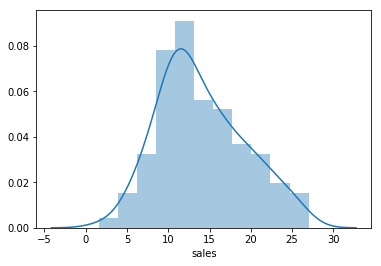

In [21]:
#First thing we need to do is visualize the data

import seaborn as sns 

sns.distplot(dataset.sales)


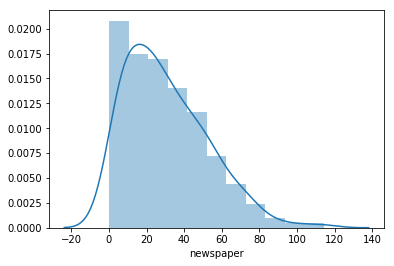

In [22]:
sns.distplot(dataset.newspaper)

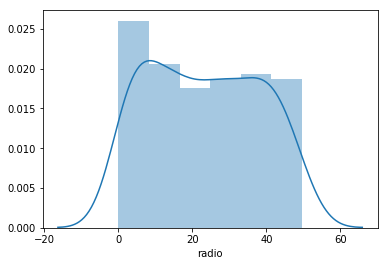

In [25]:
sns.distplot(dataset.radio)

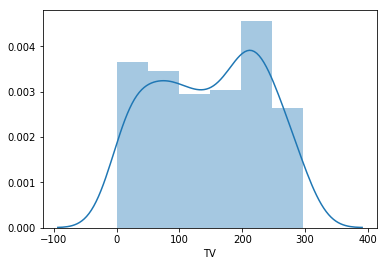

In [24]:
sns.distplot(dataset.TV)

### Task 5: Exploring Relationships between Predictors and Response

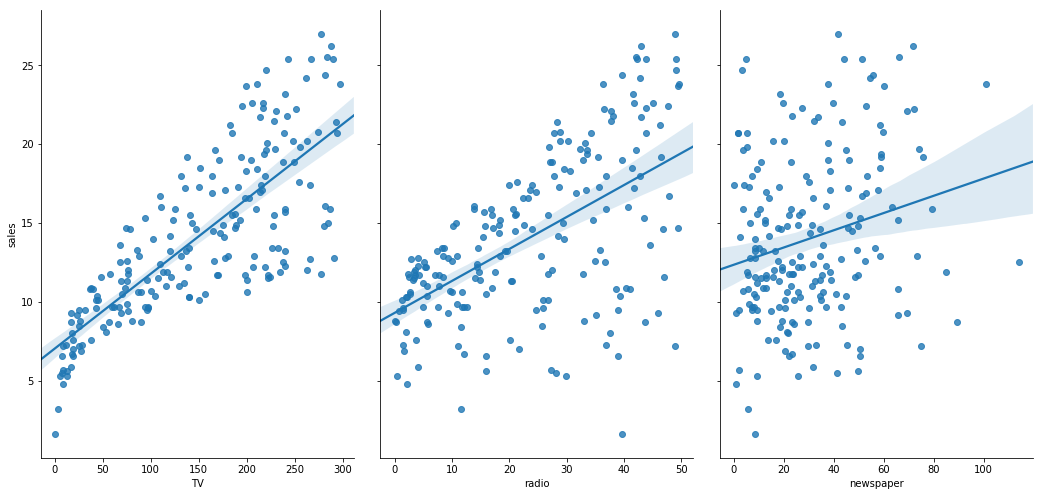

In [32]:
sns.pairplot(dataset, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 7,
            aspect = 0.7, kind = 'reg')

In [ ]:
# Strong relationship between tv ads and sales, no relationship between newspaper ads and sales!

In [33]:
dataset.TV.corr(dataset.sales) #Strong correlation

0.7822244248616061

In [35]:
dataset.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


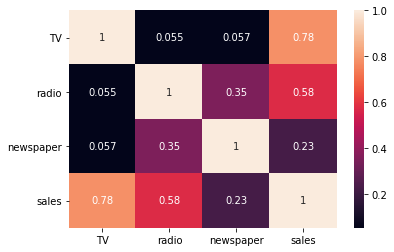

In [36]:
sns.heatmap(dataset.corr(), annot = True) #annot to display the values

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [38]:
#First fit the model, to solve for the coefficient values, then use the model to predict future values

#pandas is built on numpy

#feature vector / independent variable
X = dataset[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [39]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [41]:
#response variable
y = dataset.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [42]:
from sklearn.model_selection import train_test_split

#Create Training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
#randomstate to replicate this split in the future.

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Can see that the train/test split is 75/25 split

(150, 1)
(50, 1)
(150,)
(50,)


In [46]:
from sklearn.linear_model import LinearRegression # import LR estimator

#initiate the estimator

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
print(linreg.intercept_)
print(linreg.coef_)

#STATEMENT OF ASSOCIATION, or CORRELATION, NOT CAUSATION

#Intercept is 6.91, B0

#B1 is 0.048, is the coefficient associated with tv ad spending

6.91197261886872
[0.04802945]


### Task 7: Interpreting Model Coefficients

### Task 8: Making Predictions with our Model

In [51]:
y_pred = linreg.predict(X_test)
y_pred[:5] ##? 

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Task 9: Model Evaluation Metrics

In [54]:
##3 most commonly used evaluators for regression model 

#Create dummy data 
#Real data 
true = [100,50,30,20]

#Made up prediction values 
pred = [90,50,50,30]

## Mean absolute error
## subtracting estimated value,from true value, take absolute value 
## n = 4 in this case

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [55]:
print((10 + 0 + 20 + 10)/4) # by hand

from sklearn import metrics 
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [62]:
print(((10**2  + 0 + 20**2 + 10**2)/4)) # by hand

print(metrics.mean_squared_error(true,pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [63]:
print(np.sqrt((10**2  + 0 + 20**2 + 10**2)/4)) # by hand

print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589
